In [1]:
# Atlas CRUK plots with python

In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import numpy as np
import anndata

import sys
sys.path.append('/home/mstrasse/CRUK-code/')
from crukiopy_release.datatools import read_metadata, fix_diagnosis, diagnosis_fix_dict

this one is here : `gsutil -m cp gs://mstrasse_tmp_data/Atlas_final_May2021.h5ad .`

In [2]:
# q = sc.read_h5ad('../atlas/Atlas_adatas_June2021_Atlas_final_May2021.h5ad')
q = sc.read_h5ad('/home/mstrasse/TB4/tmp/Atlas_final_May2021.h5ad')
# q = adata
# del adata

/home/mstrasse/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


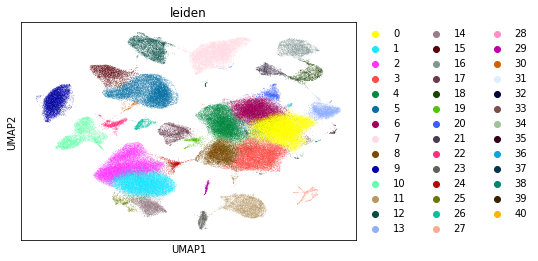

In [3]:
sc.pl.umap(q, color='leiden')

In [4]:
#batch corrected
cellclusters = dict(
    gi_epithelial=['0','3','4','6','8','13','19','20','28','31','33','34','35','36','38','39','40'], # 78049 cells, # 32 is heptoid
    squamous_epithelial=['16','18','21'],
    fibroblasts=['7'],
    myofibroblasts=['12'],
    endothelial=['15','5', '30', '26'],
    neuroendocrine=['17'],
    parietal=['29'],
    #stromal=['7','12','15','5', '30', '26'],
    neutrophils=['22'],
    monocytes_macs_DCs=['10'],  # and macs and dcs
    B_cells=['11','23'],
    cd4_Tcells=['2'],
    cd8_Tcells=['1','25'],
    NK_cells=['14'],
    mast_cells=['9'],
    hepatoid=['27'],
    naive_T_cells=['24']
    #gastric=['4','6']   
)

rev_cellclusters = dict()
for k, v in cellclusters.items():
    for vi in v:
        rev_cellclusters[vi] = k

def clusterlookup(x):
    if x in rev_cellclusters:
        return(rev_cellclusters[x])
    else:
        return('__')

In [6]:
q.obs['coarse_grain_celltypes'] = [clusterlookup(xi) for xi in q.obs.leiden]

... storing 'coarse_grain_celltypes' as categorical


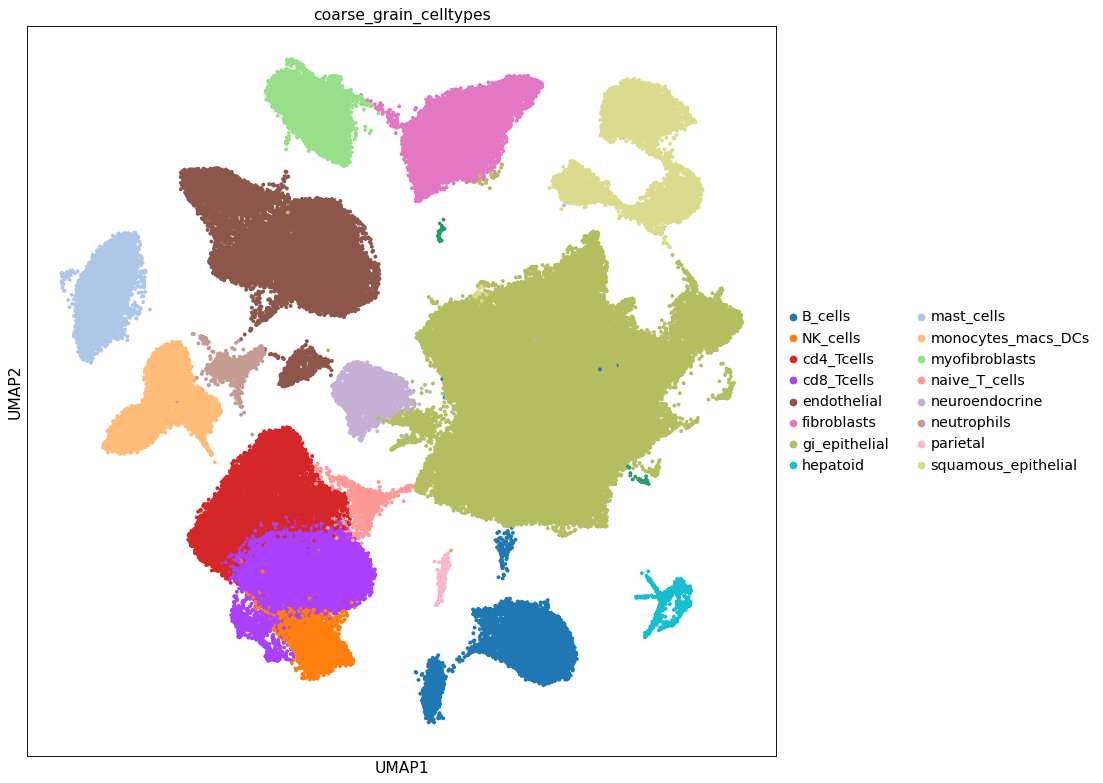

In [7]:
sc.set_figure_params(figsize = (12,12))
ax = sc.pl.umap(q, color=['coarse_grain_celltypes'], size=50)

/home/mstrasse/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


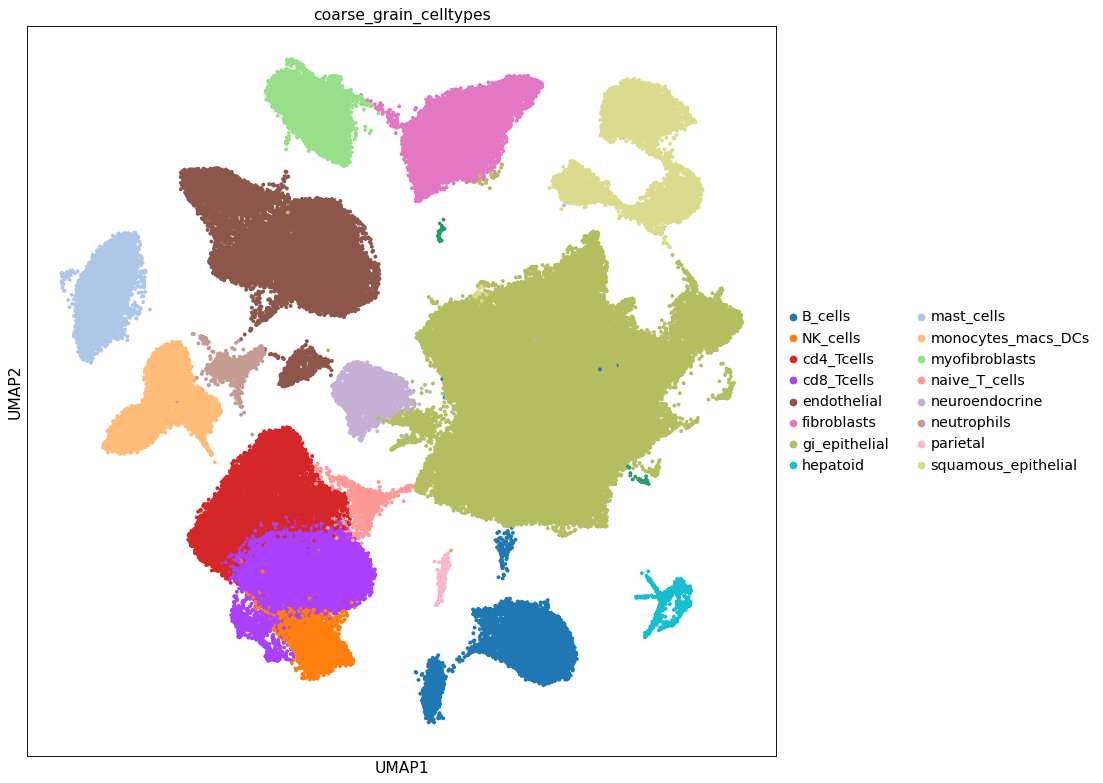

In [9]:
sc.set_figure_params(figsize = (12,12))
ax = sc.pl.umap(q, color=['coarse_grain_celltypes'], size=50)

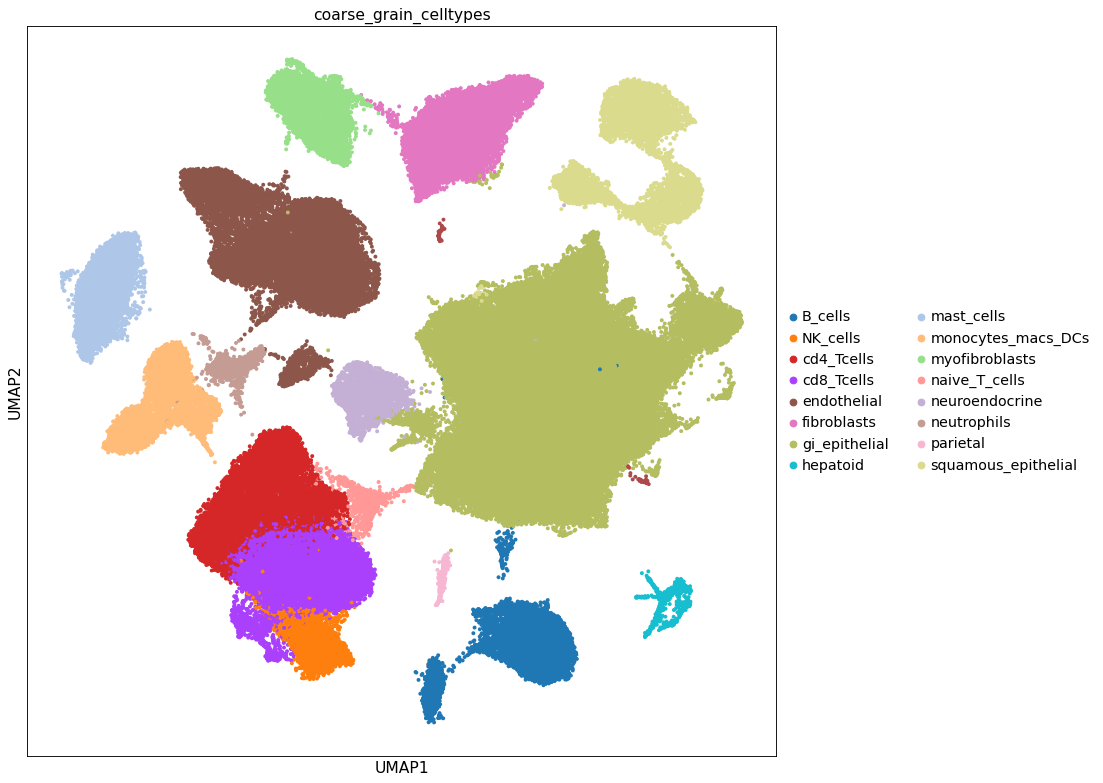

In [10]:
import matplotlib.pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

color_dict = dict({
    'B_cells':colors[0],
    'NK_cells':colors[1],
    'cd4_Tcells':colors[3],
    'cd8_Tcells':colors[4],
    'endothelial':colors[5],
    'fibroblasts':colors[6],
    'gi_epithelial':colors[7],
    'hepatoid':colors[8],
    'mast_cells':colors[9],
    'monocytes_macs_DCs':colors[10],
    'myofibroblasts':colors[11],
    'naive_T_cells':colors[12],
    'neuroendocrine':colors[13],
    'neutrophils':colors[14],
    'parietal':colors[15],
    'squamous_epithelial':colors[16],
    '__':colors[18]
})

ax = sc.pl.umap(q, color=['coarse_grain_celltypes'], palette=color_dict, size=50)


In [11]:
color_dict

{'B_cells': '#1f77b4',
 'NK_cells': '#ff7f0e',
 'cd4_Tcells': '#d62728',
 'cd8_Tcells': '#aa40fc',
 'endothelial': '#8c564b',
 'fibroblasts': '#e377c2',
 'gi_epithelial': '#b5bd61',
 'hepatoid': '#17becf',
 'mast_cells': '#aec7e8',
 'monocytes_macs_DCs': '#ffbb78',
 'myofibroblasts': '#98df8a',
 'naive_T_cells': '#ff9896',
 'neuroendocrine': '#c5b0d5',
 'neutrophils': '#c49c94',
 'parietal': '#f7b6d2',
 'squamous_epithelial': '#dbdb8d',
 '__': '#ad494a'}

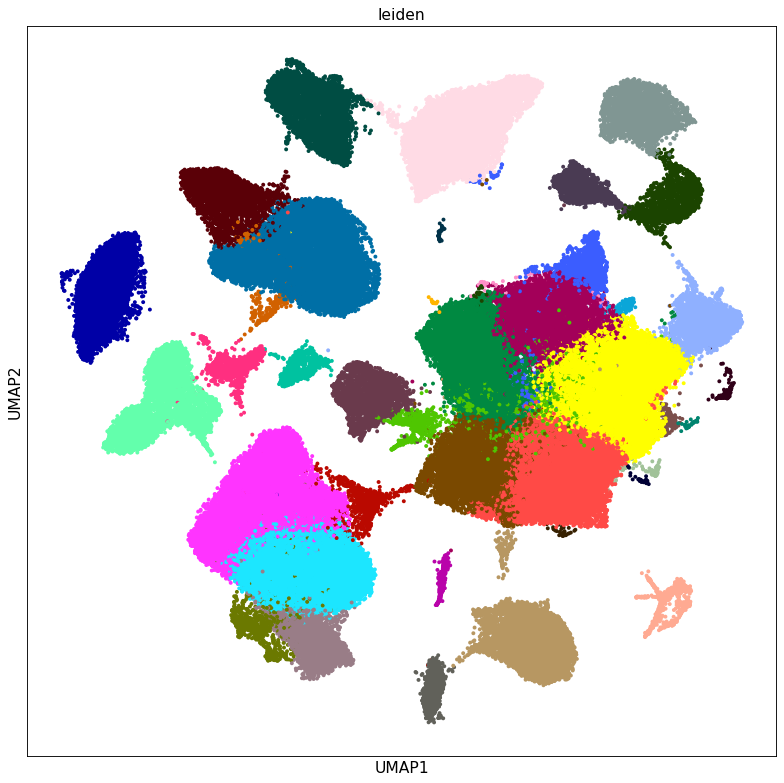

In [13]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(q, color=['leiden'], size=50, legend_loc=-1)

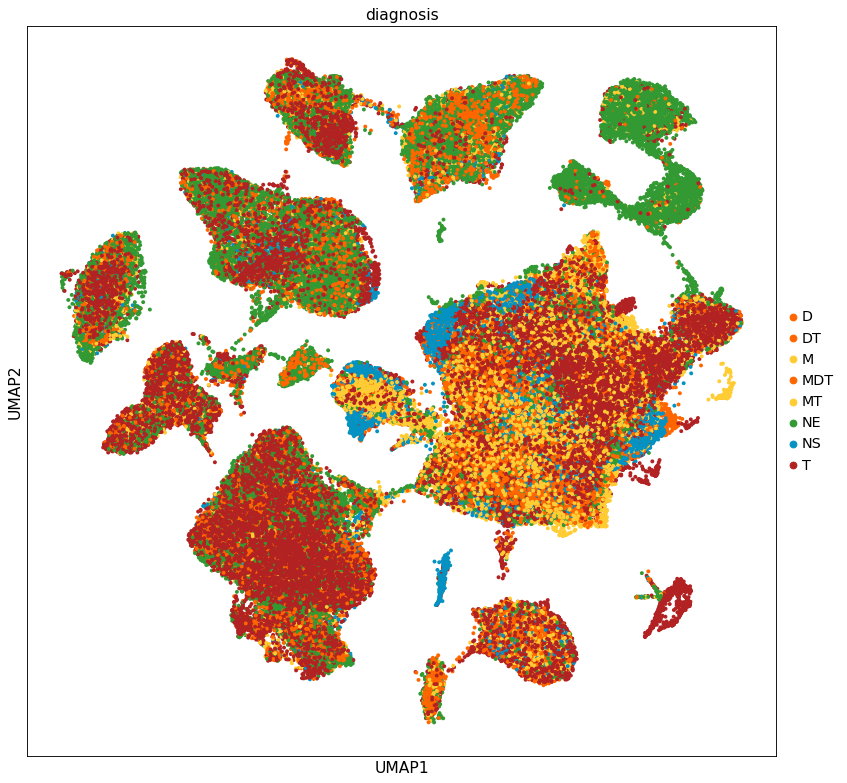

In [14]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(q, color=['diagnosis'], size=50, palette={"NE":"#339933",
                                  "NS":"#0492C2",
                                  "M":"#FFCC33",
                                  "MT":"#FFCC33",
                                  "MDT":"#FF6600",
                                  "D":"#FF6600",
                                  "DT":"#FF6600",
                                  "T":"#B22222"})


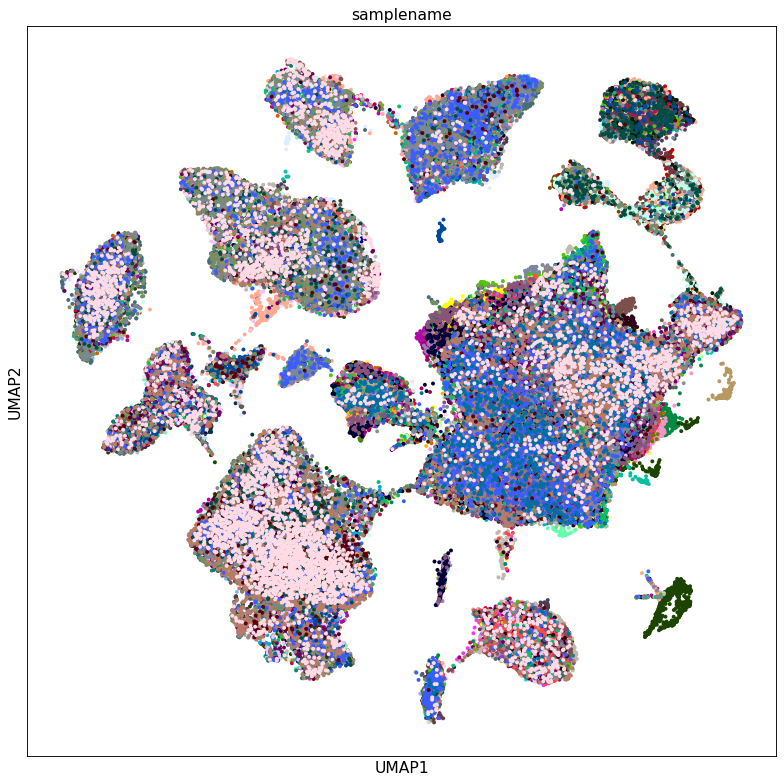

In [15]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(q, color=['samplename'], size=50, legend_loc=-1)

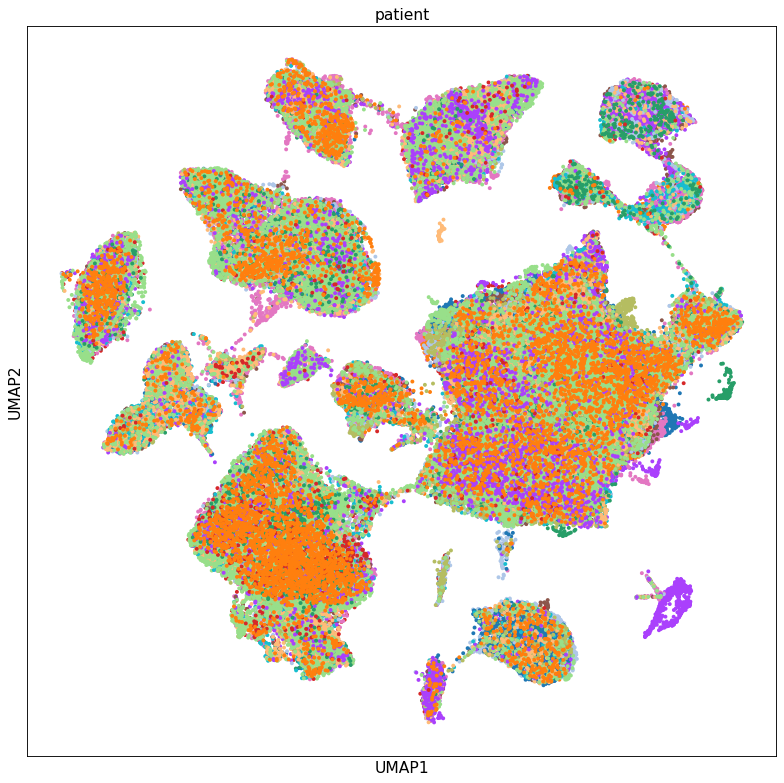

In [16]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(q, color=['patient'], size=50, legend_loc=-1)

In [23]:
sc.tl.rank_genes_groups(q, 'coarse_grain_celltypes', method='wilcoxon')

/home/daveg/.local/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


In [24]:
sc.tl.dendrogram(q, groupby='coarse_grain_celltypes')

In [25]:
marker_gene_mat = pd.DataFrame(q.uns['rank_genes_groups']['names']).head(5)

In [26]:
marker_gene_mat

B_cells NK_cells      __ cd4_Tcells cd8_Tcells endothelial fibroblasts  \
0  JCHAIN      CD7  MYL12A        CD2       CCL5      PECAM1         DCN   
1   CD79A     GNLY    TPM2      PTPRC      PTPRC        TCF4      COL1A2   
2    IGKC     CCL5    YBX3       CD3D      CXCR4     SPARCL1      COL6A2   
3    MZB1    CD247    TPT1       IL7R       CD3G       GNG11         LUM   
4   IGHA1     NKG7   GAPDH       CD3G       CD3D       RAMP2         C1S   

  gi_epithelial hepatoid mast_cells monocytes_macs_DCs myofibroblasts  \
0          KRT8      AFP     TPSAB1             TYROBP           MYL9   
1          AGR2      TTR      TPSB2             FCER1G          CALD1   
2         KRT18      VTN       CPA3               SRGN          ACTA2   
3        TSPAN8    APOA1      HPGDS               AIF1         IGFBP7   
4          ELF3     APOE      MS4A2            HLA-DRA         NOTCH3   

  naive_T_cells neuroendocrine neutrophils parietal squamous_epithelial  
0         PTPRC          MS4A8       CXCL8    CBLIF                CSTA  
1           FYN          PROX1        SRGN    ATP4B               KRT13  
2         SYTL3       HEPACAM2      BCL2A1    KCNE2              S100A9  
3       PPP2R5C           CHGA      S100A8      CKB               ANXA1  
4          STK4        ARFGEF3      S100A9    ATP4A              S100A8

In [27]:
# get the marker genes in order
marker_genes_dict = {}
marker_genes = []

for ci in cellclusters.keys():
    marker_genes_dict[ci] = marker_gene_mat[ci].tolist()
    marker_genes +=  marker_gene_mat[ci].tolist()

marker_genes_dict

{'gi_epithelial': ['KRT8', 'AGR2', 'KRT18', 'TSPAN8', 'ELF3'],
 'squamous_epithelial': ['CSTA', 'KRT13', 'S100A9', 'ANXA1', 'S100A8'],
 'fibroblasts': ['DCN', 'COL1A2', 'COL6A2', 'LUM', 'C1S'],
 'myofibroblasts': ['MYL9', 'CALD1', 'ACTA2', 'IGFBP7', 'NOTCH3'],
 'endothelial': ['PECAM1', 'TCF4', 'SPARCL1', 'GNG11', 'RAMP2'],
 'neuroendocrine': ['MS4A8', 'PROX1', 'HEPACAM2', 'CHGA', 'ARFGEF3'],
 'parietal': ['CBLIF', 'ATP4B', 'KCNE2', 'CKB', 'ATP4A'],
 'neutrophils': ['CXCL8', 'SRGN', 'BCL2A1', 'S100A8', 'S100A9'],
 'monocytes_macs_DCs': ['TYROBP', 'FCER1G', 'SRGN', 'AIF1', 'HLA-DRA'],
 'B_cells': ['JCHAIN', 'CD79A', 'IGKC', 'MZB1', 'IGHA1'],
 'cd4_Tcells': ['CD2', 'PTPRC', 'CD3D', 'IL7R', 'CD3G'],
 'cd8_Tcells': ['CCL5', 'PTPRC', 'CXCR4', 'CD3G', 'CD3D'],
 'NK_cells': ['CD7', 'GNLY', 'CCL5', 'CD247', 'NKG7'],
 'mast_cells': ['TPSAB1', 'TPSB2', 'CPA3', 'HPGDS', 'MS4A2'],
 'hepatoid': ['AFP', 'TTR', 'VTN', 'APOA1', 'APOE'],
 'naive_T_cells': ['PTPRC', 'FYN', 'SYTL3', 'PPP2R5C', 'STK4']}

In [28]:
for ci in cellclusters.keys():
    print(ci)

gi_epithelial
squamous_epithelial
fibroblasts
myofibroblasts
endothelial
neuroendocrine
parietal
neutrophils
monocytes_macs_DCs
B_cells
cd4_Tcells
cd8_Tcells
NK_cells
mast_cells
hepatoid
naive_T_cells


In [29]:
pd.DataFrame(q.uns['rank_genes_groups']['names']).head(50).to_csv('coarse_grain_cell_markers.csv')

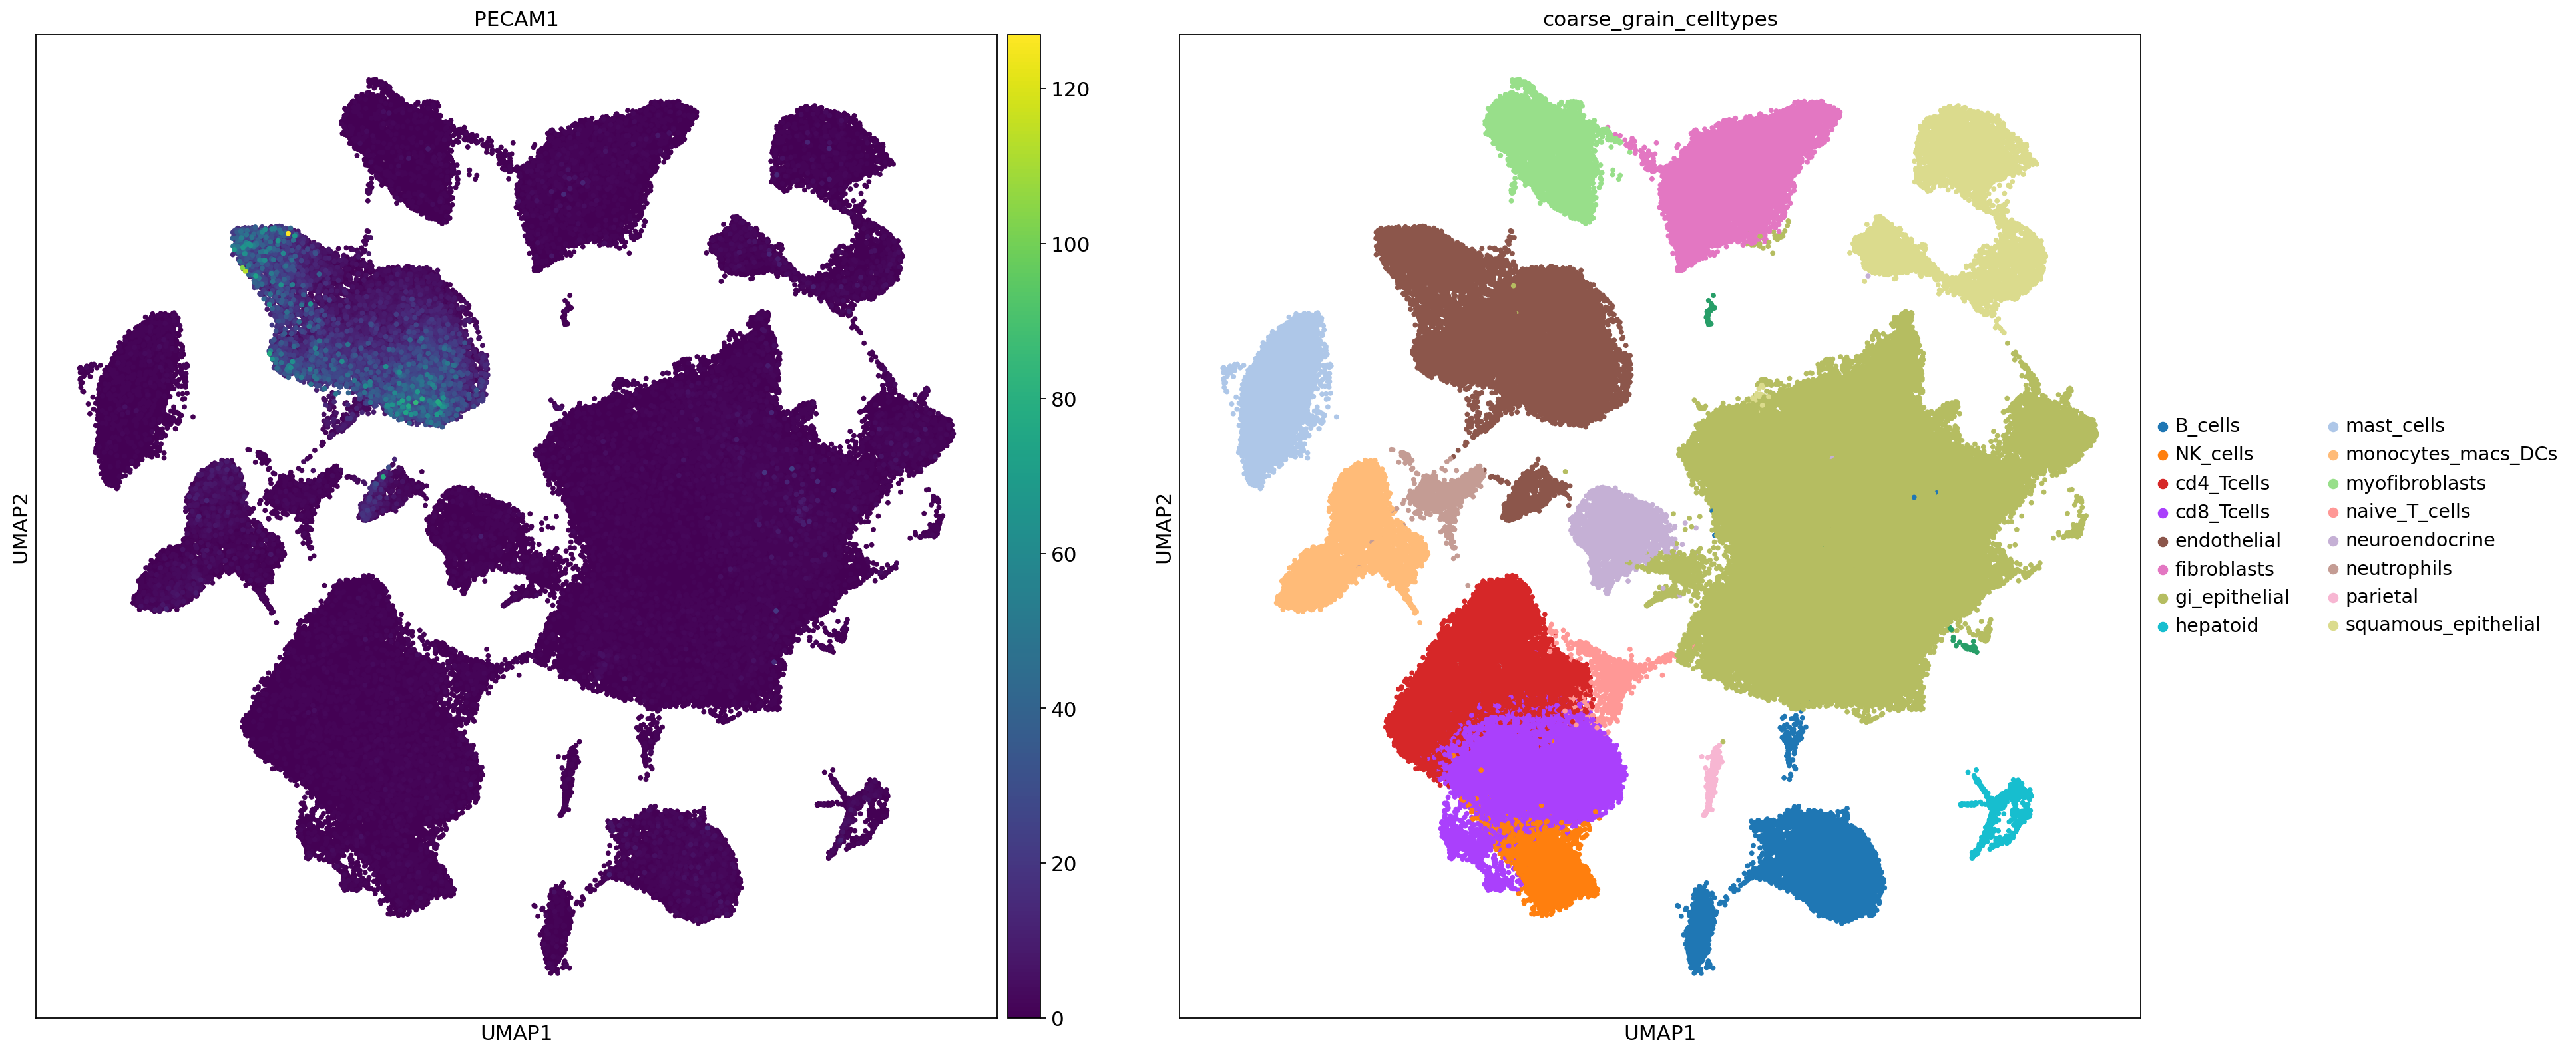

In [30]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(q, color=['PECAM1','coarse_grain_celltypes'], size=50)

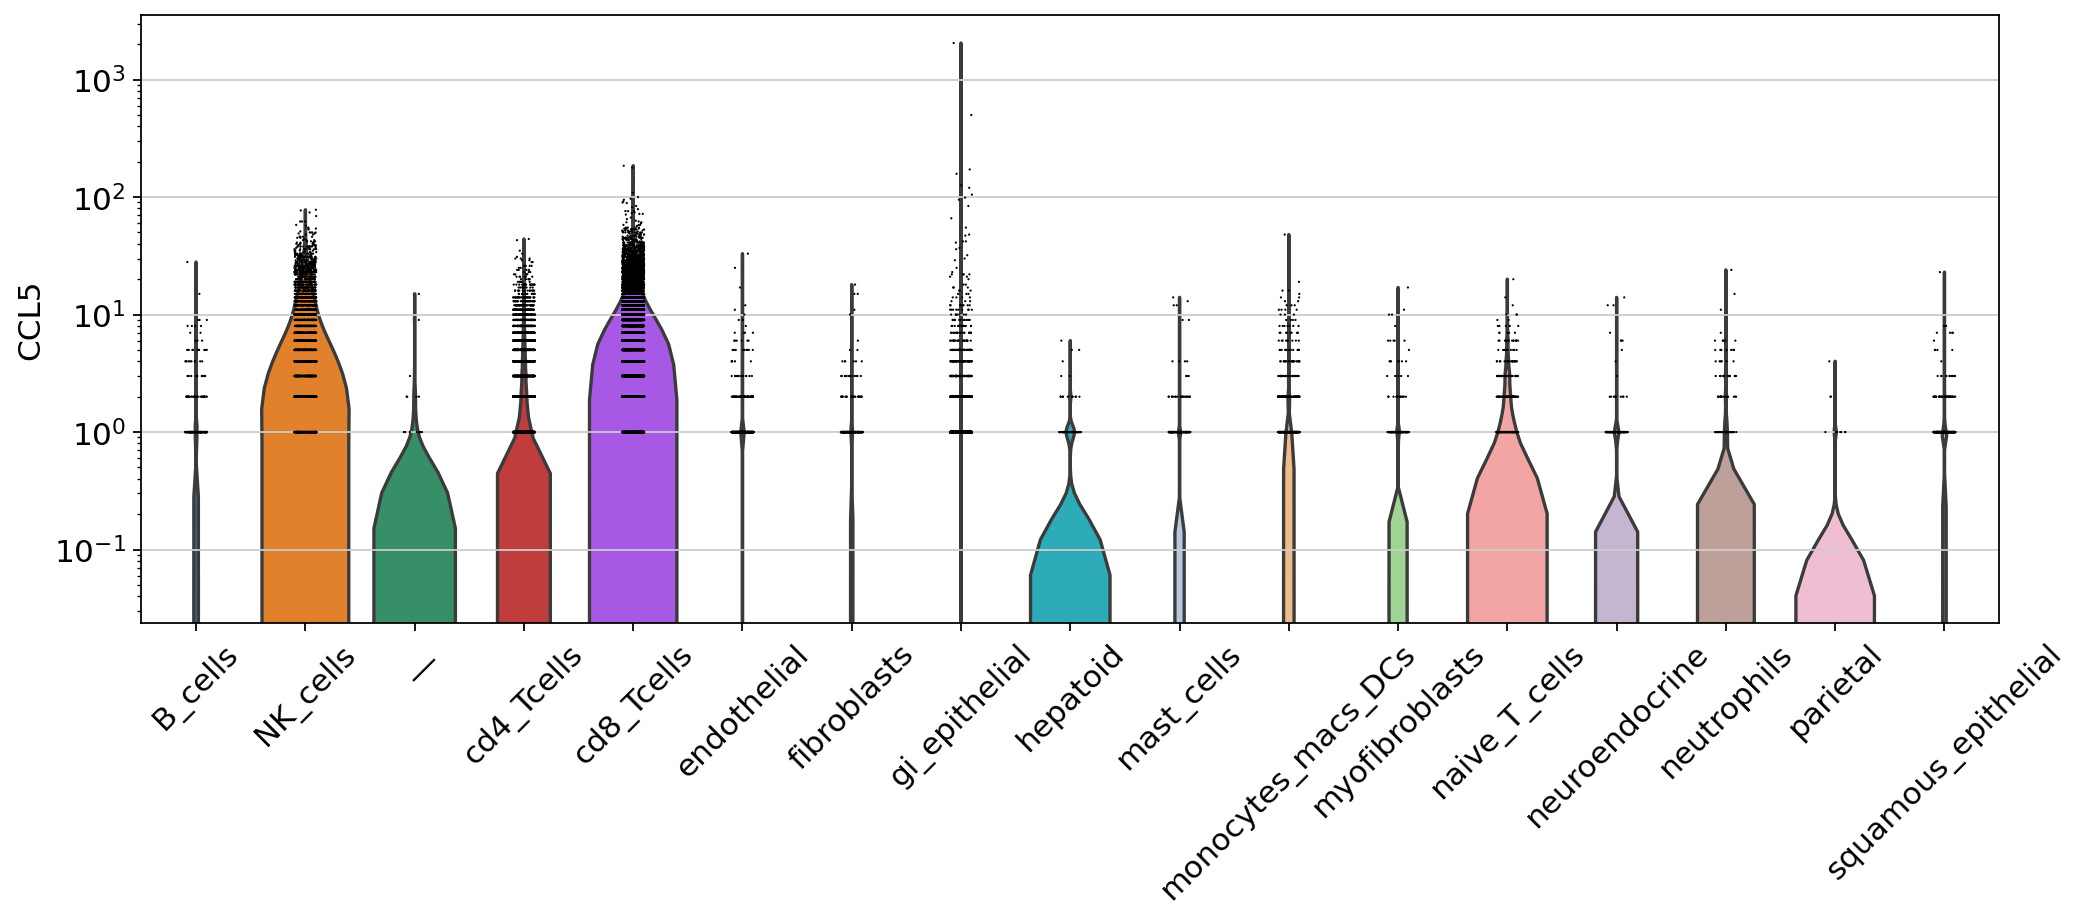

In [31]:
sc.set_figure_params(figsize = (12,5))
sc.pl.violin(q, ['CCL5'], groupby='coarse_grain_celltypes', log=True, rotation=45)

In [32]:
cell_order=[
                       'squamous',
                       'neuroendocrine',
                       'parietal',
                       'epithelial',
                       'endothelial',
                       'fibroblasts',
                       'myofibroblasts',
                       'Bcells',
                       '__',
                       'monocytes_macs_DCs',
                       'neutrophils',
                       'mastcells',
                       'NKcells',
                       'cd4_Tcells',
                       'cd8_Tcells']

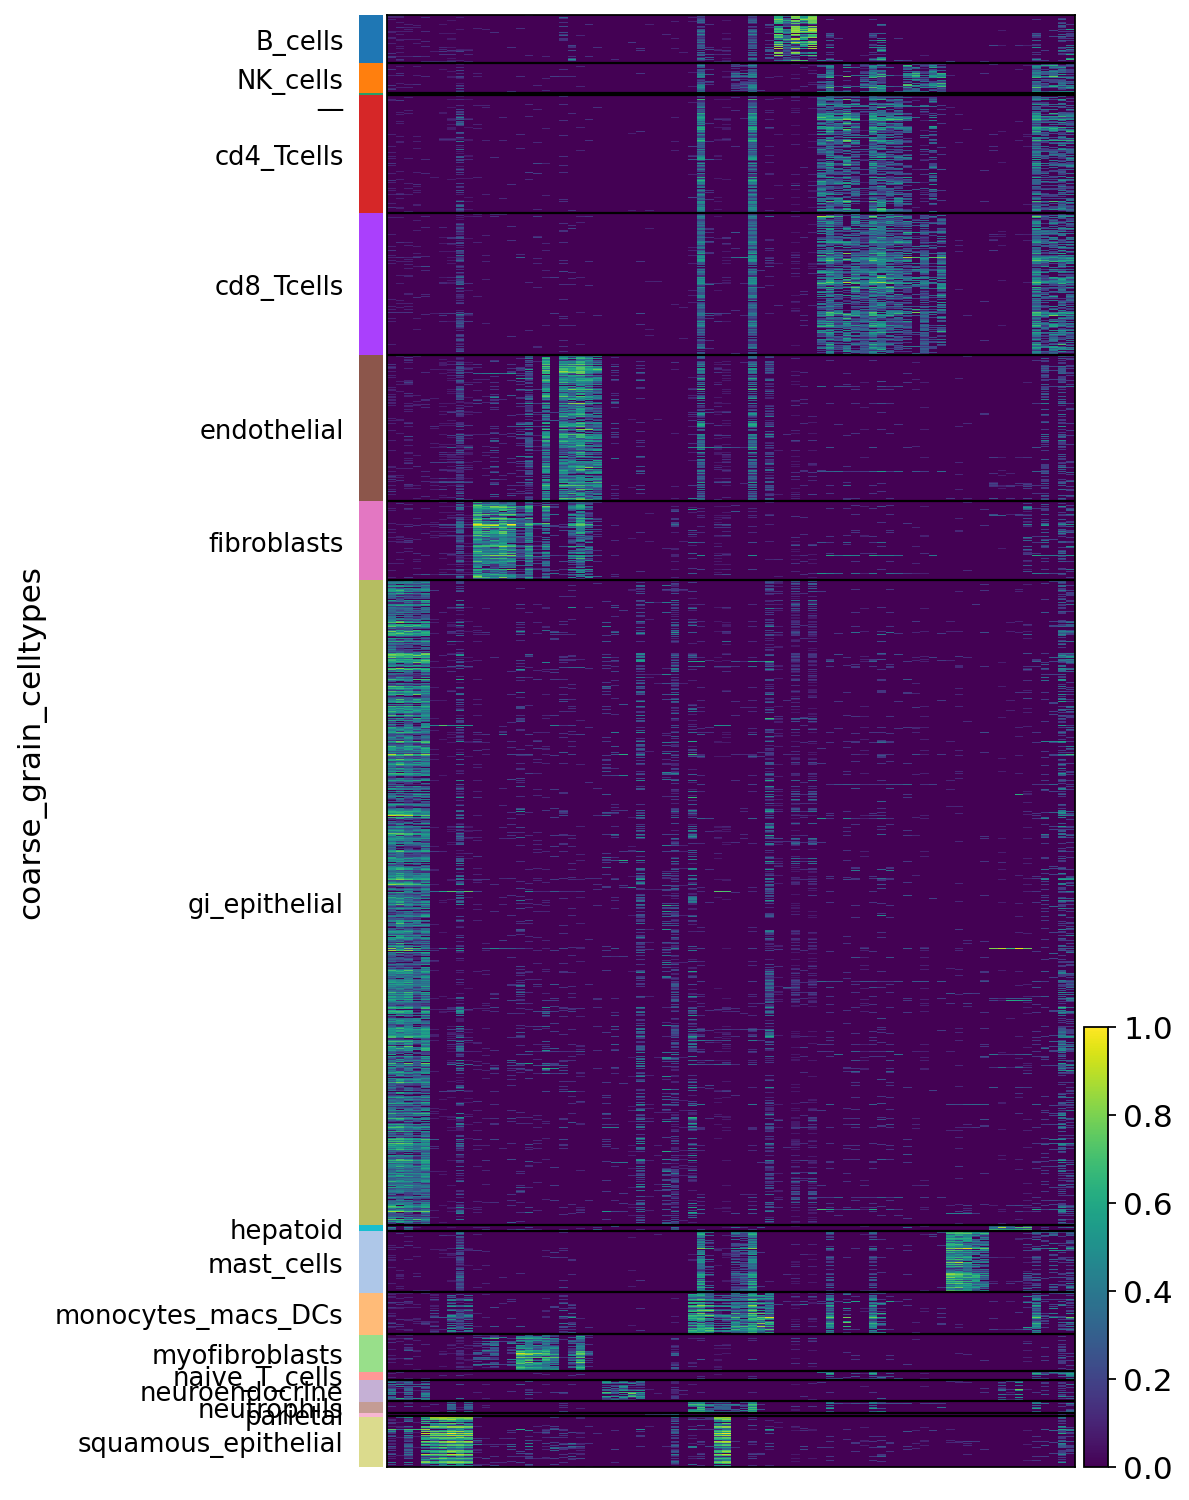

In [33]:
ax = sc.pl.heatmap(q, marker_genes, groupby='coarse_grain_celltypes', 
                   use_raw=False, log=True, standard_scale='var', swap_axes=False, figsize=(6,12), dendrogram=False)

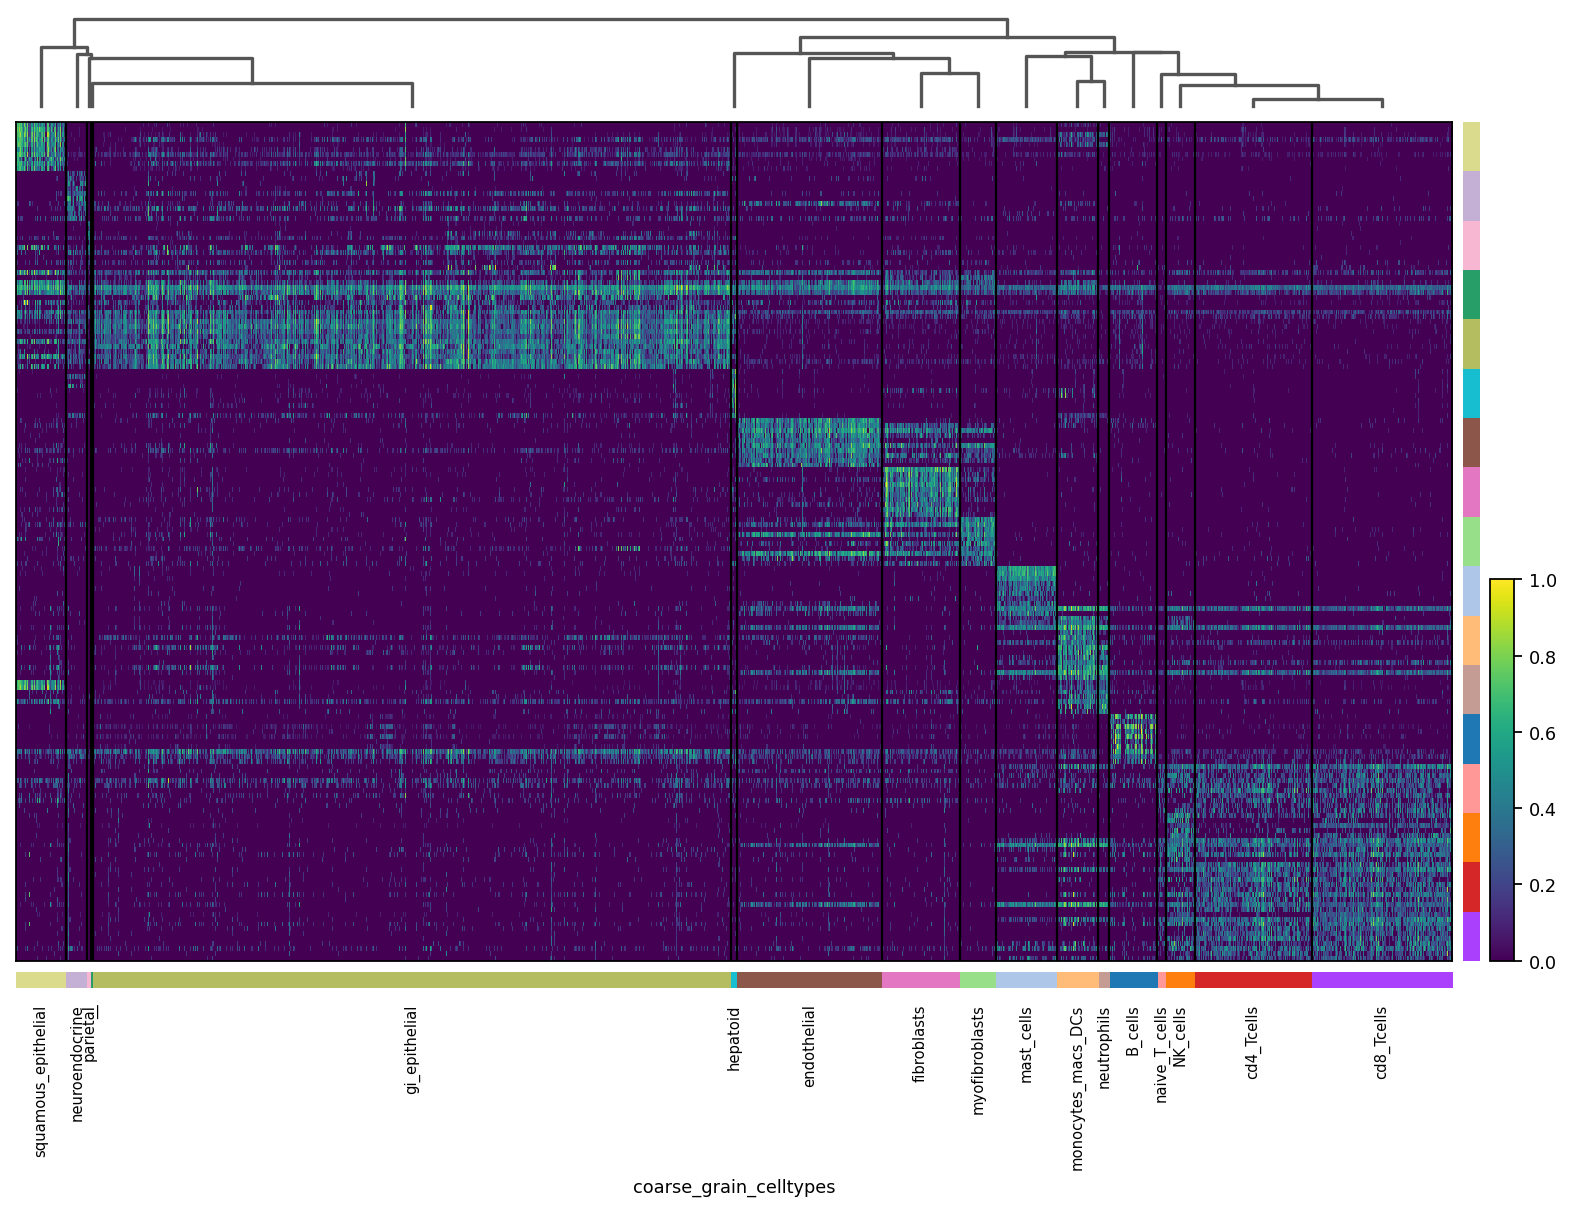

In [34]:
sc.set_figure_params(scanpy=True, fontsize=8)
sc.pl.rank_genes_groups_heatmap(q, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False, groupby='coarse_grain_celltypes',
                                 log=True, standard_scale='var', figsize=(12,8))

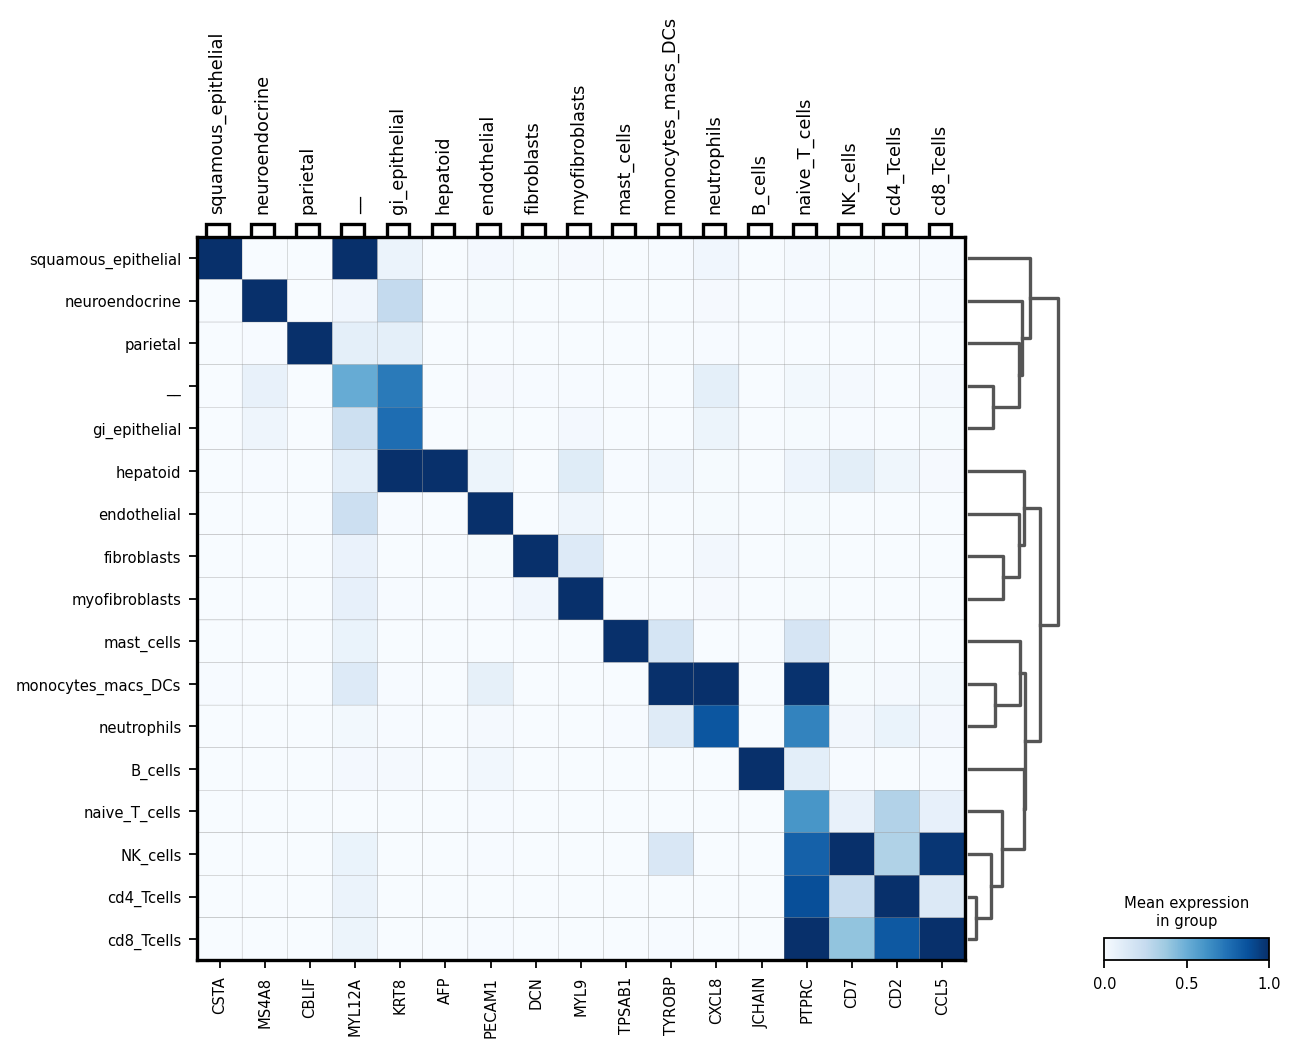

In [35]:
axs = sc.pl.rank_genes_groups_matrixplot(q, n_genes=1, standard_scale='var', cmap='Blues')

In [37]:
q.obs.to_csv('coarse_grain_cell_types_obs.csv')

In [6]:
q = sc.read_h5ad('atlas/Aug2021_Lung_adatas_celltypes_Epithelial cells.h5ad')

In [8]:
q.obs

samplename  n_genes  n_molecules  doublet_score  \
AAAGAACCAGAAGCGT-L08A       L08A      523       1319.0       0.072717   
AACACACCAAGCGGAT-L08A       L08A     2660       5356.0       0.044535   
AACCAACGTTGCGTAT-L08A       L08A     1900       4917.0       0.062812   
AAGACAACACAGTACT-L08A       L08A     2008       3704.0       0.093619   
AAGCGAGCAGGATCTT-L08A       L08A     4171      13194.0       0.166667   
...                          ...      ...          ...            ...   
TTTCAGTCACATGAAA-L09A       L09A     3198      10902.0       0.023414   
TTTCCTCGTATACGGG-L09A       L09A     4449      16648.0       0.024743   
TTTGGAGGTGTATTGC-L09A       L09A     2882       6333.0       0.011788   
TTTGGTTAGCGAGAAA-L09A       L09A     6125      31973.0       0.052767   
TTTGGTTCATCAGCAT-L09A       L09A     5136      22410.0       0.025684   

                       percent_mito leiden louvain diagnosis phase  \
AAAGAACCAGAAGCGT-L08A      0.002274      4       4         N    G1   
AACACACCAAGCGGAT-L08A      0.084391      2       3         N    G1   
AACCAACGTTGCGTAT-L08A      0.016270      1       2         N    G1   
AAGACAACACAGTACT-L08A      0.082883     10       9         N    G1   
AAGCGAGCAGGATCTT-L08A      0.052979     15      15         N    G1   
...                             ...    ...     ...       ...   ...   
TTTCAGTCACATGAAA-L09A      0.065584      1       2         N    G1   
TTTCCTCGTATACGGG-L09A      0.053400      1       2         N    G1   
TTTGGAGGTGTATTGC-L09A      0.063793     10       9         N    G1   
TTTGGTTAGCGAGAAA-L09A      0.109186      1       2         N    G1   
TTTGGTTCATCAGCAT-L09A      0.052164      1       2         N    G1   

                      sample_diagnosis  ...  procedure    hcl_refined  \
AAAGAACCAGAAGCGT-L08A           L08A_N  ...  resection      Club.cell   
AACACACCAAGCGGAT-L08A           L08A_N  ...  resection  Ciliated.cell   
AACCAACGTTGCGTAT-L08A           L08A_N  ...  resection       AT2.cell   
AAGACAACACAGTACT-L08A           L08A_N  ...  resection       AT1.cell   
AAGCGAGCAGGATCTT-L08A           L08A_N  ...  resection       AT2.cell   
...                                ...  ...        ...            ...   
TTTCAGTCACATGAAA-L09A           L09A_N  ...  resection       AT2.cell   
TTTCCTCGTATACGGG-L09A           L09A_N  ...  resection       AT2.cell   
TTTGGAGGTGTATTGC-L09A           L09A_N  ...  resection       AT1.cell   
TTTGGTTAGCGAGAAA-L09A           L09A_N  ...  resection       AT2.cell   
TTTGGTTCATCAGCAT-L09A           L09A_N  ...  resection       AT2.cell   

                                                       hcl_celltype hcl_score  \
AAAGAACCAGAAGCGT-L08A                        Club.cell.Adult.Lung3.  0.287185   
AACACACCAAGCGGAT-L08A  Ciliated.cell.Airway.Epithelium_Plasschaert.  0.452402   
AACCAACGTTGCGTAT-L08A                         AT2.cell.Adult.Lung3.  0.503784   
AAGACAACACAGTACT-L08A                         AT1.cell.Adult.Lung3.  0.370095   
AAGCGAGCAGGATCTT-L08A                         AT2.cell.Adult.Lung3.  0.440857   
...                                                             ...       ...   
TTTCAGTCACATGAAA-L09A                         AT2.cell.Adult.Lung3.  0.563377   
TTTCCTCGTATACGGG-L09A                         AT2.cell.Adult.Lung3.  0.556769   
TTTGGAGGTGTATTGC-L09A                         AT1.cell.Adult.Lung3.  0.410308   
TTTGGTTAGCGAGAAA-L09A                         AT2.cell.Adult.Lung3.  0.606752   
TTTGGTTCATCAGCAT-L09A                         AT2.cell.Adult.Lung3.  0.565738   

                             CLid  \
AAAGAACCAGAAGCGT-L08A  CL:0000158   
AACACACCAAGCGGAT-L08A  CL:0002145   
AACCAACGTTGCGTAT-L08A  CL:0002063   
AAGACAACACAGTACT-L08A  CL:0002062   
AAGCGAGCAGGATCTT-L08A  CL:0002063   
...                           ...   
TTTCAGTCACATGAAA-L09A  CL:0002063   
TTTCCTCGTATACGGG-L09A  CL:0002063   
TTTGGAGGTGTATTGC-L09A  CL:0002062   
TTTGGTTAGCGAGAAA-L09A  CL:0002063   
TTTGGTTCATCAGCAT-L09A  CL:0002063   

         

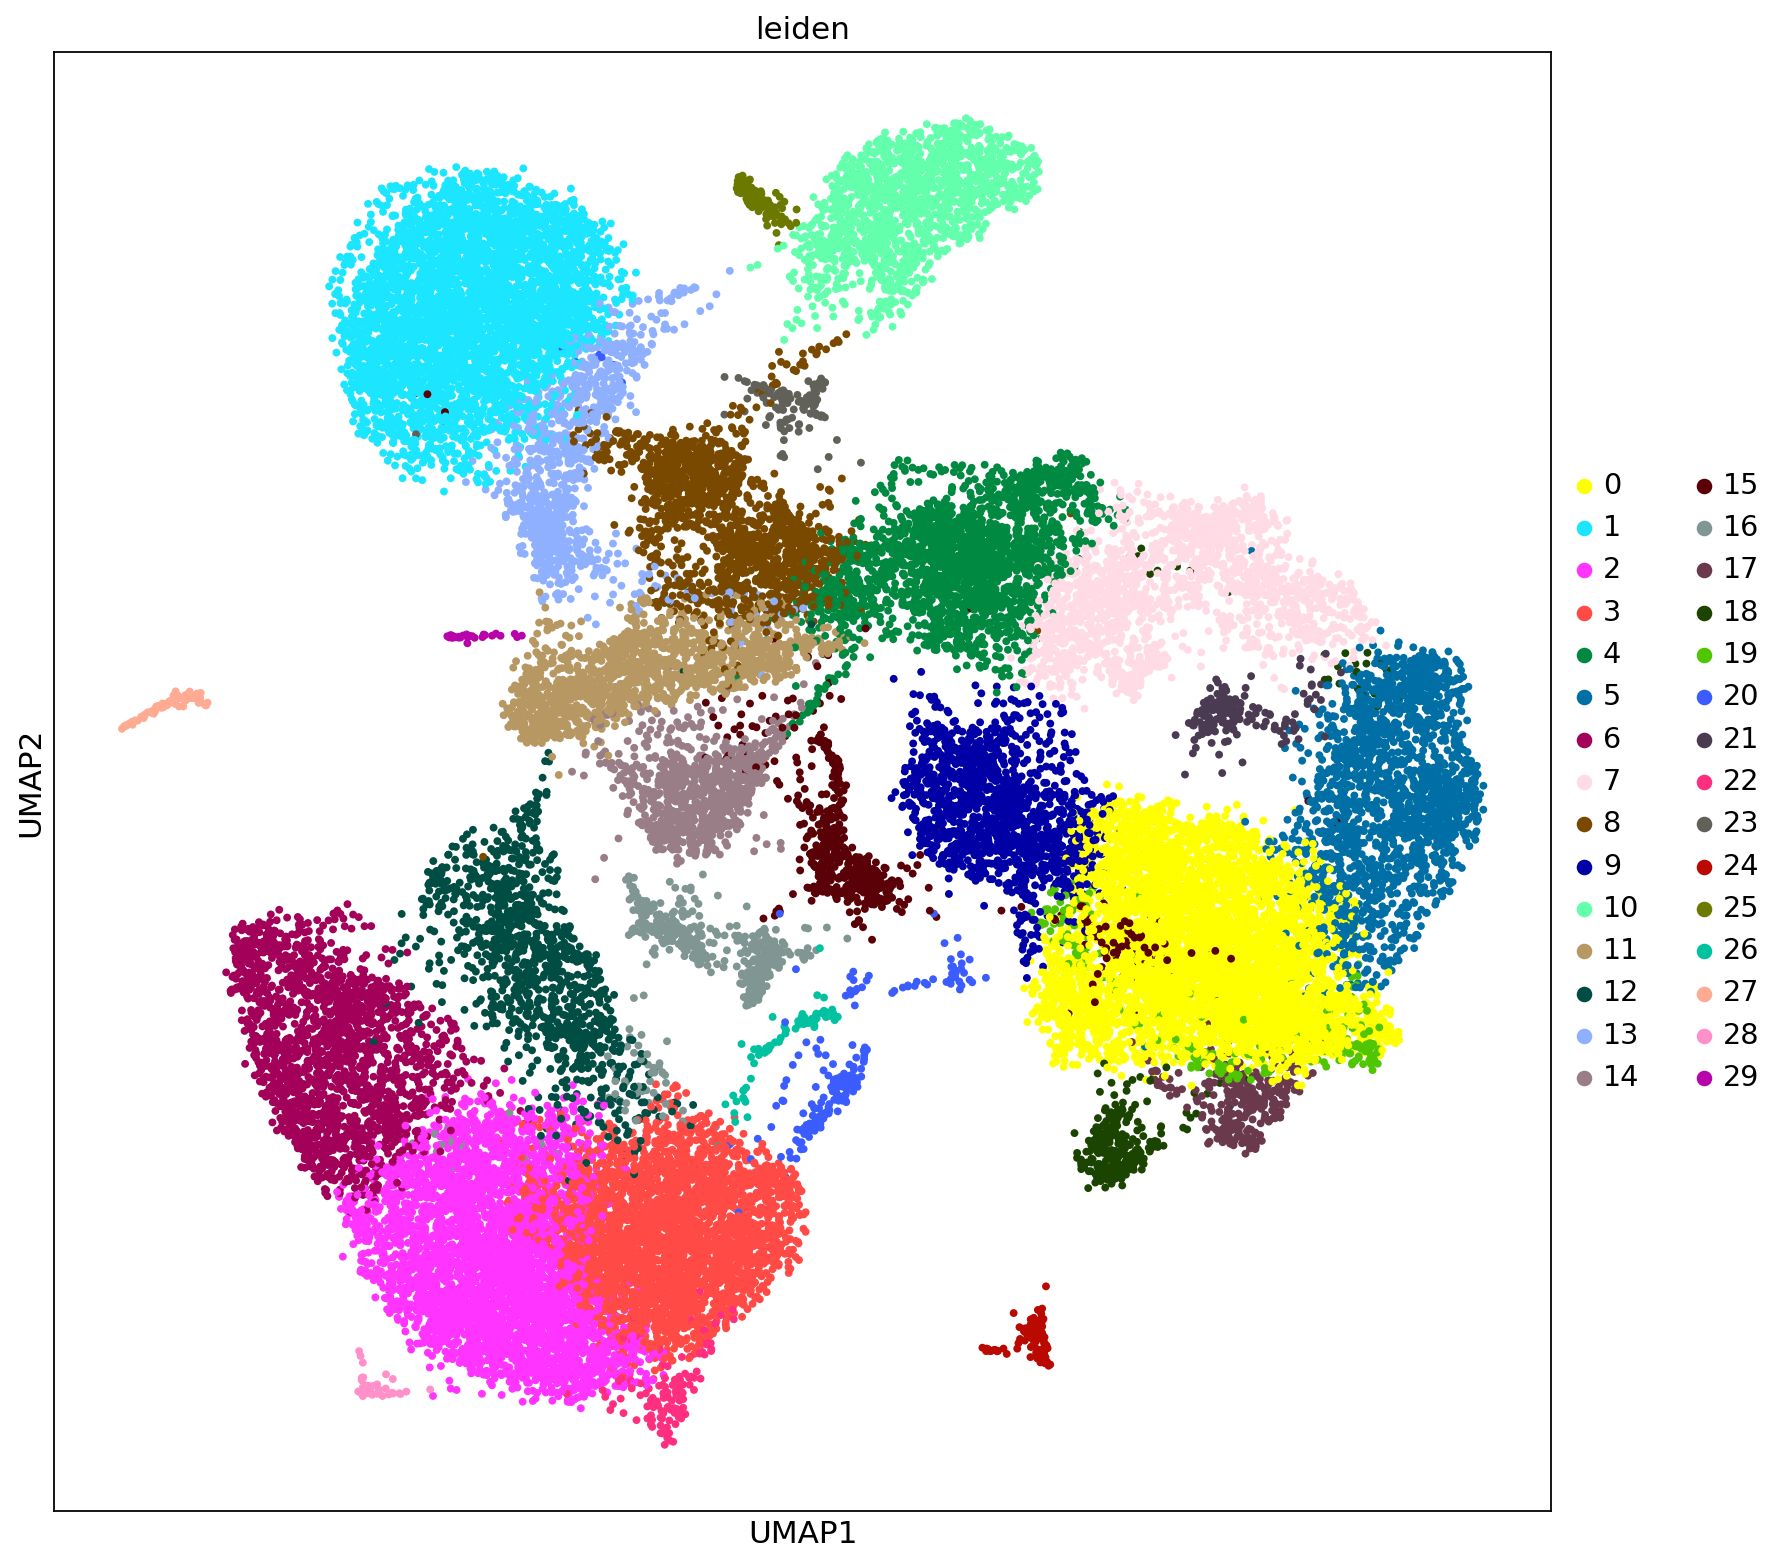

In [10]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(q, color=['leiden'], size=50)

# Updated UMAP layout (as in cellbrowser)

the full dataset with updated layout is located here: `gsutil -m cp gs://cruk-adata-for-cellbrowser/Aug2022_adata/Atlas/Eso_Atlas.h5ad .`
Lets pull over the cell type labels from the old UMAP based on cell-barcodes

In [18]:
adata = sc.read_h5ad('/home/mstrasse/TB4/Aug2022_adata/Atlas/Eso_Atlas.h5ad')
# Stringent filtering!!
adata = adata[adata.obs.doublet_score<0.2]
adata = adata[adata.obs.percent_mito<0.1]

# fixing some diagnosis
adata = fix_diagnosis(adata)
adata = adata[adata.obs.diagnosis.isin(['NE', 'NS', 'M','D','T'])]

In [25]:
adata.obs= adata.obs.merge(q.obs[['coarse_grain_celltypes']], left_index=True, right_index=True, how='left')

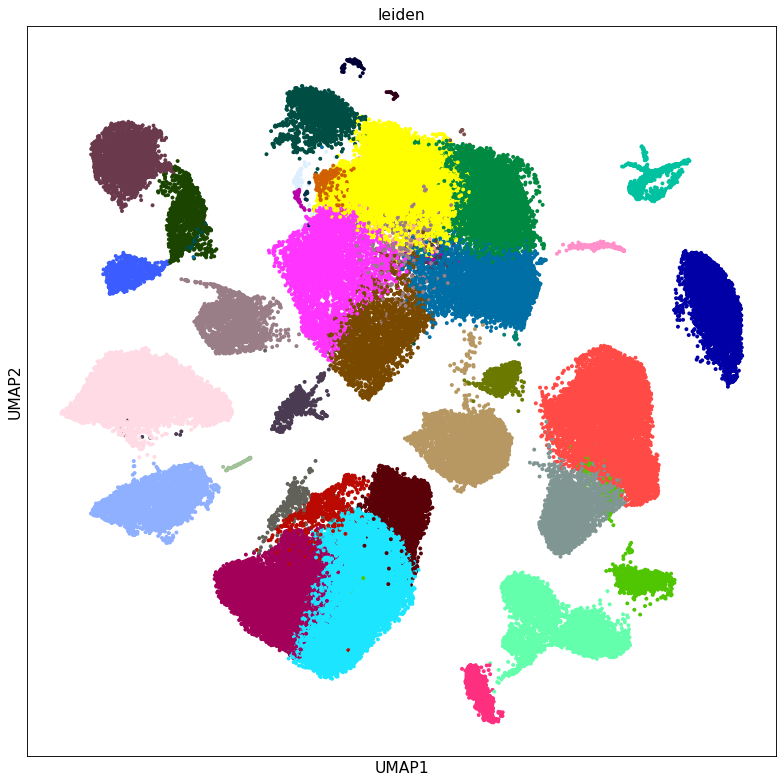

In [30]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(adata, color=['leiden'], size=50, legend_loc=-1)

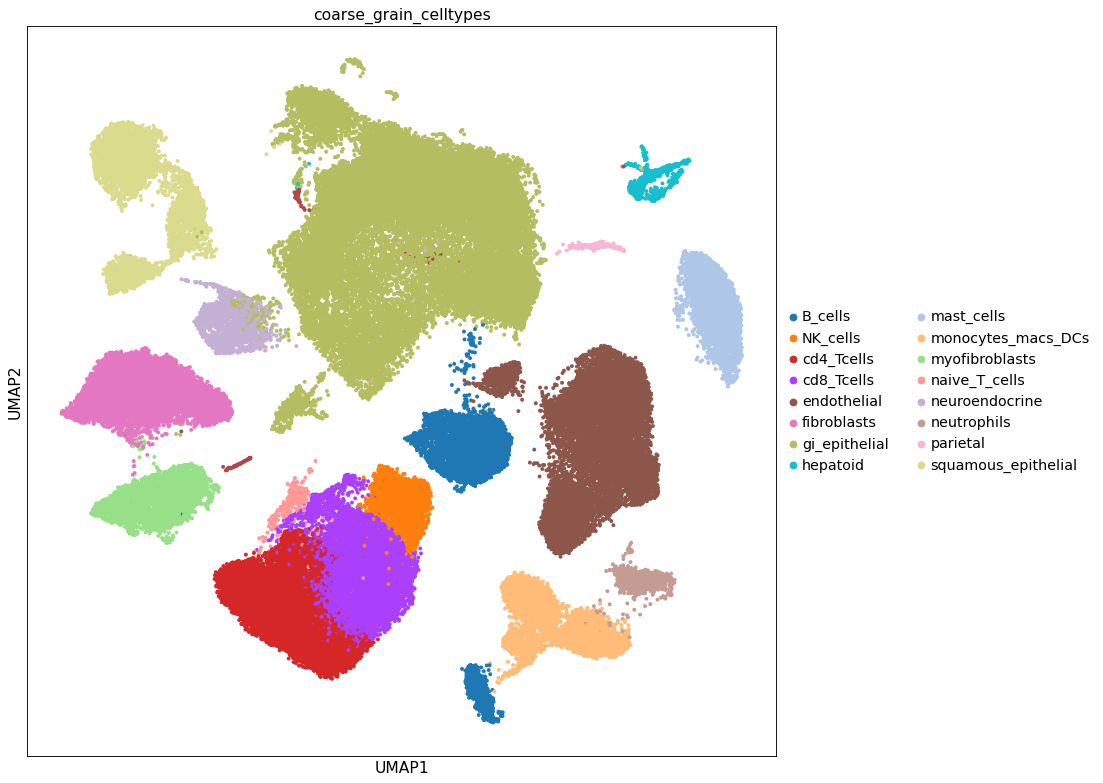

In [46]:
import matplotlib.pyplot as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

color_dict = dict({
    'B_cells':colors[0],
    'NK_cells':colors[1],
    'cd4_Tcells':colors[3],
    'cd8_Tcells':colors[4],
    'endothelial':colors[5],
    'fibroblasts':colors[6],
    'gi_epithelial':colors[7],
    'hepatoid':colors[8],
    'mast_cells':colors[9],
    'monocytes_macs_DCs':colors[10],
    'myofibroblasts':colors[11],
    'naive_T_cells':colors[12],
    'neuroendocrine':colors[13],
    'neutrophils':colors[14],
    'parietal':colors[15],
    'squamous_epithelial':colors[16],
    '__':colors[18]
})

ax = sc.pl.umap(adata, color=['coarse_grain_celltypes'], palette=color_dict, size=50)

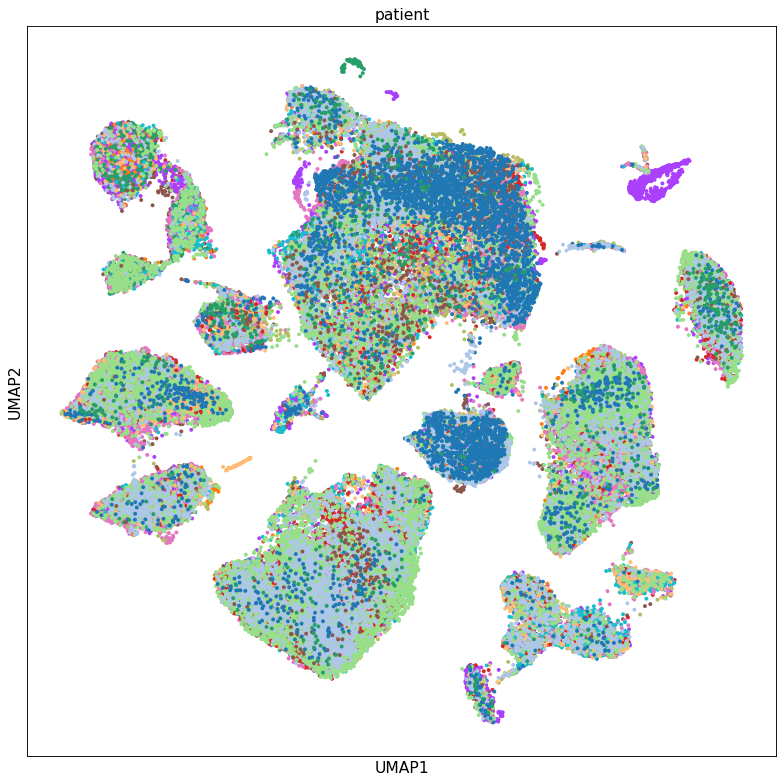

In [48]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(adata, color=['patient'], size=50, legend_loc=-1)

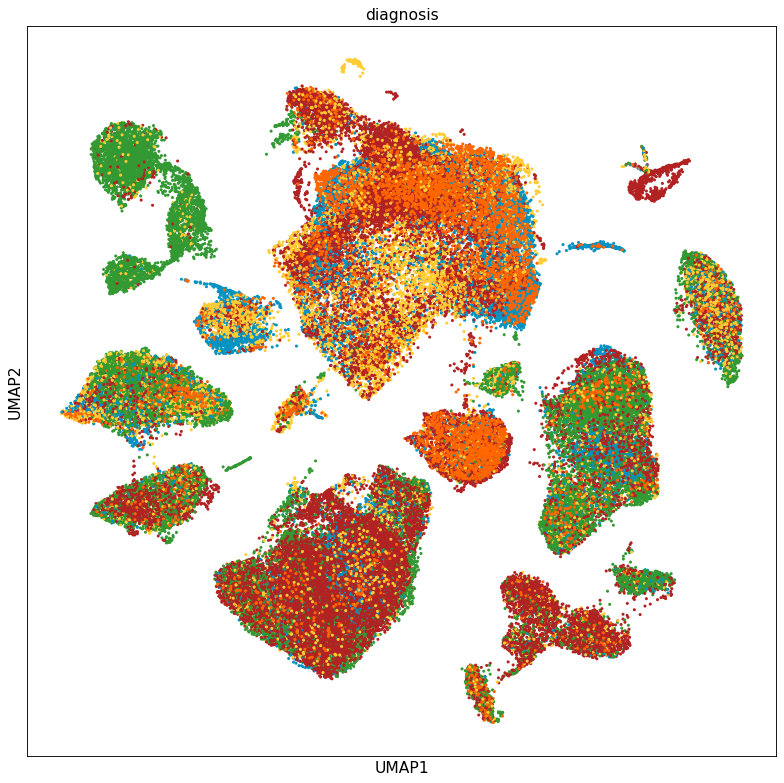

In [49]:
from sctools.scplotting import recolor
from crukiopy_release.colormaps import color_dict_diagnosis, color_dict_coarse_celltype, color_dict_CellLabels
recolor(adata, 'diagnosis', color_dict_diagnosis )
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(adata, color=['diagnosis'], size=30, legend_loc=-1)

# batch vs not batchcorrected

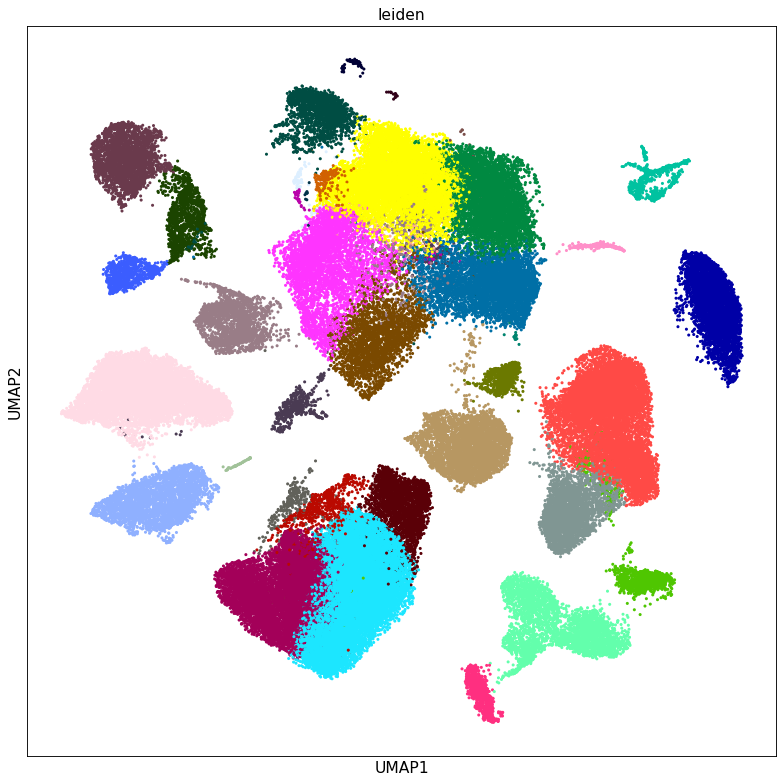

In [50]:
sc.set_figure_params(figsize = (12,12))
sc.pl.umap(adata, color=['leiden'], size=30, legend_loc=-1)

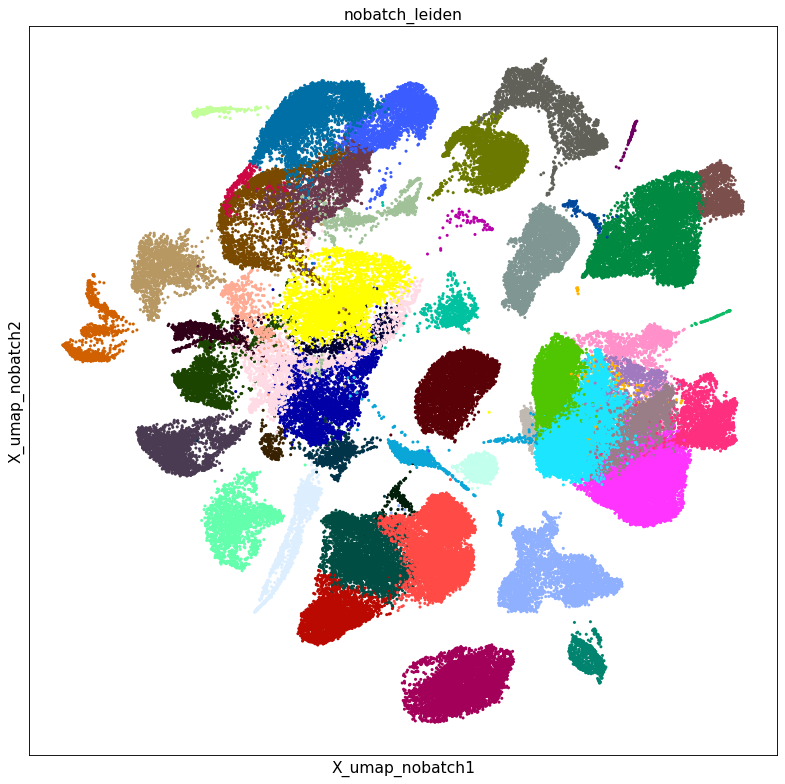

In [54]:
sc.set_figure_params(figsize = (12,12))
sc.pl.embedding(adata, basis='X_umap_nobatch', color=['nobatch_leiden'], size=30, legend_loc=-1)

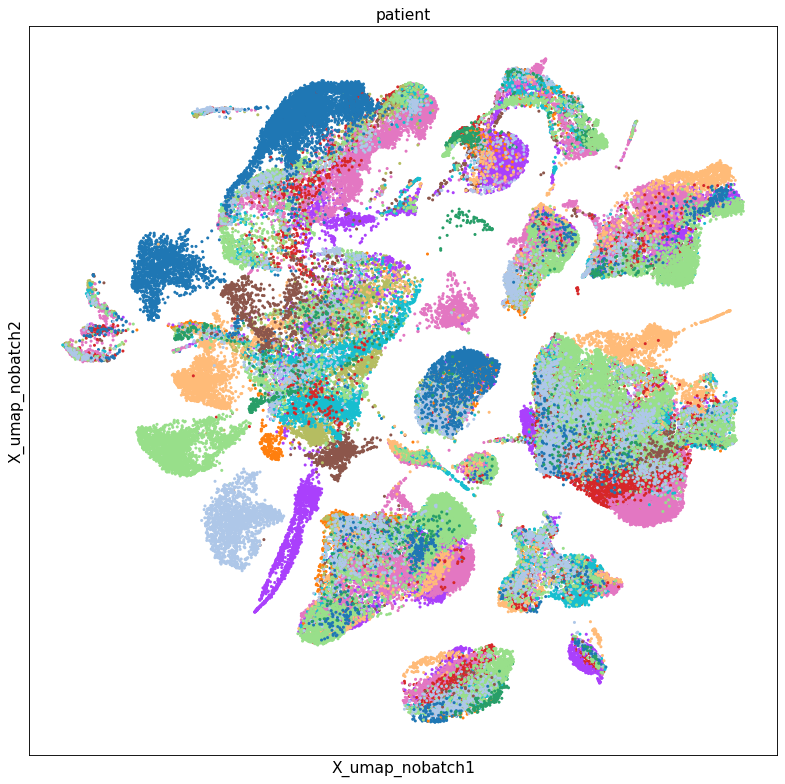

In [53]:
sc.set_figure_params(figsize = (12,12))
sc.pl.embedding(adata, basis='X_umap_nobatch', color=['patient'], size=30, legend_loc=-1)

In [ ]:
colordict_phase = {
    'G1' : 
}

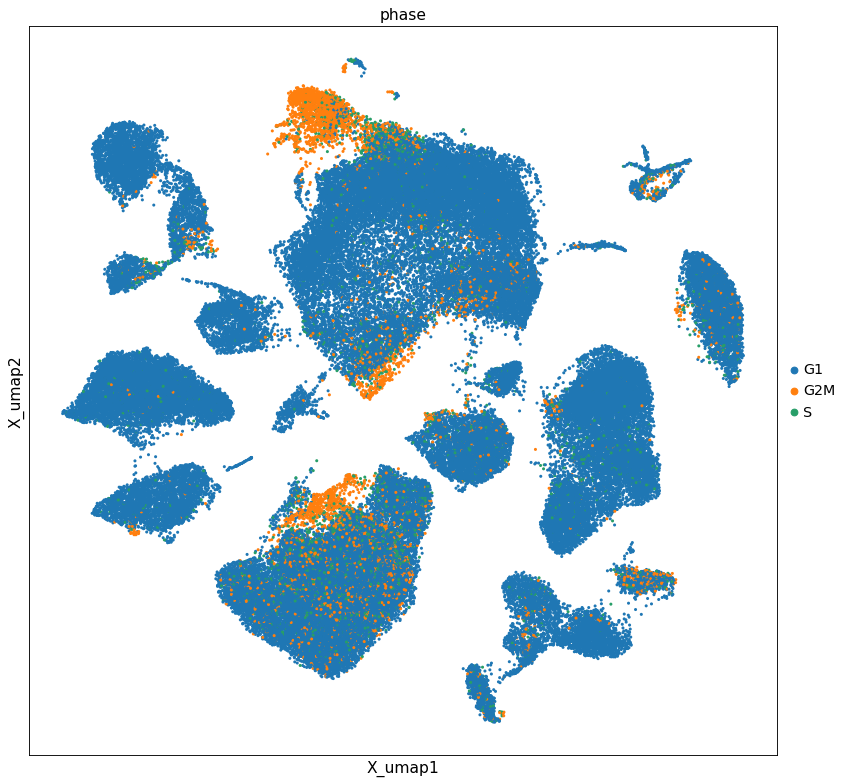

In [56]:
sc.set_figure_params(figsize = (12,12))
sc.pl.embedding(adata, basis='X_umap', color=['phase'], size=30)